In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import figure

color_baseline = "black"
color_ours = "darkorange"

figure(figsize=(5, 3), dpi=300)
exp_name = "D10"

<Figure size 1500x900 with 0 Axes>

In [42]:
df_baseline = pd.read_csv("D10_results/AM/train_df_AM_D10.csv")

In [43]:
df_ours = pd.read_csv("D10_results/Ours/train_df_Ours_D10.csv")

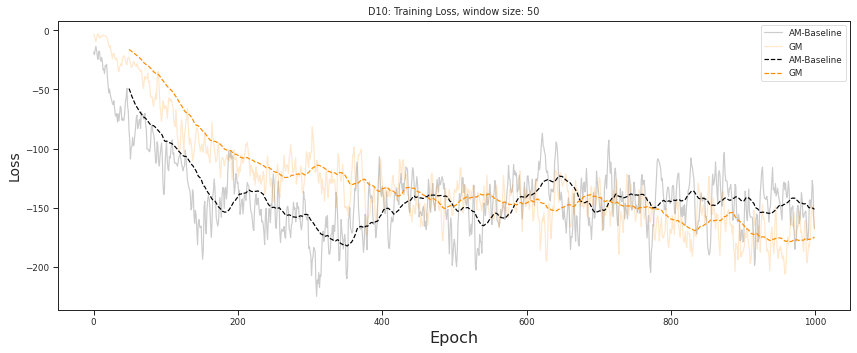

In [44]:
window_size = 50

df_baseline["loss"].rolling(1).mean().plot(label = "AM-Baseline", alpha = 0.2, color = color_baseline)
df_ours["loss"].rolling(1).mean().plot(label="GM", alpha = 0.2, color = color_ours)
df_baseline["loss"].rolling(window_size).mean().plot(label = "AM-Baseline", linestyle = "--", color = color_baseline)
df_ours["loss"].rolling(window_size).mean().plot(label="GM", linestyle = "--", color = color_ours)

plt.legend()
plt.title(f"{exp_name}: Training Loss, window size: {window_size}")
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.tight_layout()

plt.savefig(exp_name+"_loss_curve.png", dpi=300)

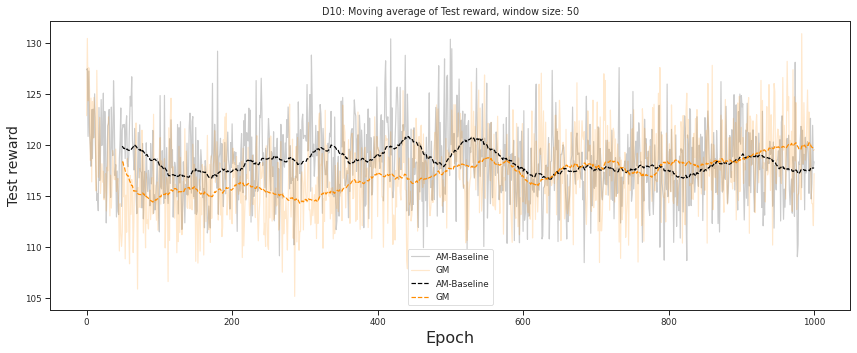

In [45]:
window_size = 50

df_baseline["test_reward"].rolling(1).mean().plot(label = "AM-Baseline", alpha=0.2, color = color_baseline)
df_ours["test_reward"].rolling(1).mean().plot(label="GM", alpha=0.2, color = color_ours)
df_baseline["test_reward"].rolling(window_size).mean().plot(label = "AM-Baseline", color = color_baseline, linestyle = "--")
df_ours["test_reward"].rolling(window_size).mean().plot(label="GM", color = color_ours, linestyle = "--")

plt.legend()
plt.title(f"{exp_name}: Moving average of Test reward, window size: {window_size}")
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Test reward', fontsize=14)
plt.tight_layout()

plt.savefig(exp_name+"_test_reward_curve.png", dpi=300)

In [82]:
df_baseline["test_reward_upper"] = df_baseline["test_reward"] + 2*df_baseline["test_reward_std"]
df_baseline["test_reward_lower"] = df_baseline["test_reward"] - 2*df_baseline["test_reward_std"]

df_ours["test_reward_upper"] = df_ours["test_reward"] + 2*df_ours["test_reward_std"]
df_ours["test_reward_lower"] = df_ours["test_reward"] - 2*df_ours["test_reward_std"]


Text(0.5, 1.0, 'Test reward over epochs')

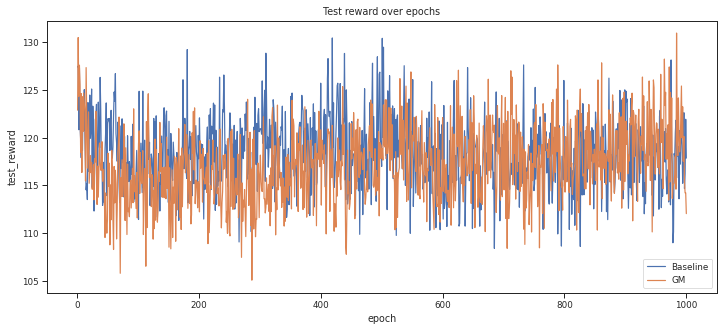

In [83]:
sns.lineplot(data=df_baseline, x = "epoch", y ="test_reward", label="Baseline")
sns.lineplot(data=df_ours, x = "epoch", y ="test_reward", label="GM")
plt.title("Test reward over epochs")

In [99]:
def plot_test_reward(exp_name, df_baseline, df_ours):
    """
    Compares the test reward of AM (baseline) and GM during training
    """
    window_size = 50

    df_baseline["test_reward"].rolling(1).mean().plot(label = "AM-Baseline", alpha=0.2, color = color_baseline)
    df_ours["test_reward"].rolling(1).mean().plot(label="GM", alpha=0.2, color = color_ours)
    df_baseline["test_reward"].rolling(window_size).mean().plot(label = "AM-Baseline", color = color_baseline, linestyle = "--")
    df_ours["test_reward"].rolling(window_size).mean().plot(label="GM", color = color_ours, linestyle = "--")
    plt.legend()
    plt.title(f"{exp_name}: Moving average of Test reward, window size: {window_size}")
    plt.tight_layout()
    plt.savefig(f"{exp_name}_test_reward.png", dpi=300)
    
    return
    
def plot_loss(exp_name, df_baseline, df_ours):
    """
    Compares the loss of AM (baseline) and GM during training
    """
    window_size = 50
    
    df_baseline["loss"].rolling(1).mean().plot(label = "AM-Baseline", alpha = 0.2, color = color_baseline)
    df_ours["loss"].rolling(1).mean().plot(label="GM", alpha = 0.2, color = color_ours)
    df_baseline["loss"].rolling(window_size).mean().plot(label = "AM-Baseline", linestyle = "--", color = color_baseline)
    df_ours["loss"].rolling(window_size).mean().plot(label="GM", linestyle = "--", color = color_ours)

    plt.legend()
    plt.title(f"{exp_name}: Loss, window size: {window_size}")
    plt.tight_layout()
    plt.savefig(f"{exp_name}_loss.png", dpi=300)
    
    return
    

/tmp/ipykernel_104302/45350298.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_104302/45350298.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_104302/45350298.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_104302/45350298.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


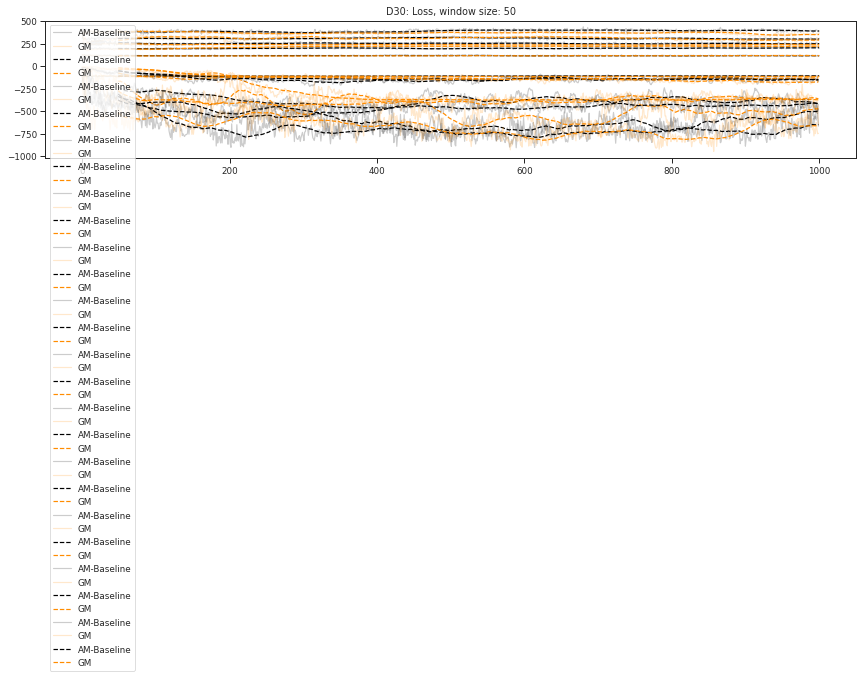

In [100]:
for exp_name in exp_folders:
    df_baseline = pd.read_csv(exp_name+"_results/AM/train_df_AM_"+exp_name+".csv")
    df_ours = pd.read_csv(exp_name+"_results/Ours/train_df_Ours_"+exp_name+".csv")
    plot_test_reward(exp_name, df_baseline, df_ours)
    plot_loss(exp_name, df_baseline, df_ours)
    

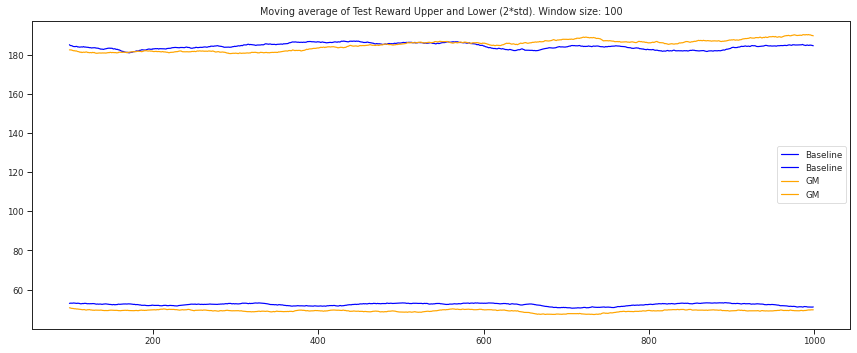

In [88]:
window_size = 100

df_baseline["test_reward_upper"].rolling(window_size).mean().plot(label = "Baseline", color = "blue")
df_baseline["test_reward_lower"].rolling(window_size).mean().plot(label = "Baseline", color = "blue")
df_ours["test_reward_upper"].rolling(window_size).mean().plot(label = "GM", color = "orange")
df_ours["test_reward_lower"].rolling(window_size).mean().plot(label = "GM", color = "orange")

plt.legend()
plt.title(f"Moving average of Test Reward Upper and Lower (2*std). Window size: {window_size}")
plt.tight_layout()

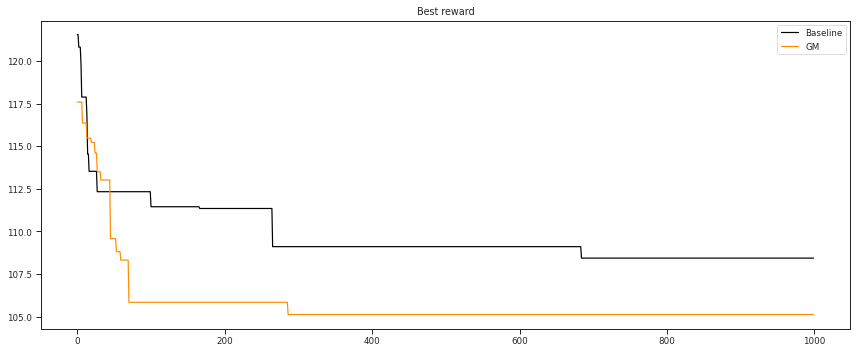

In [92]:
df_baseline["best_reward"].plot(label = "Baseline", color = color_baseline)
df_ours["best_reward"].plot(label="GM", color = color_ours)
plt.legend()
plt.title(f"Best reward")
plt.tight_layout()

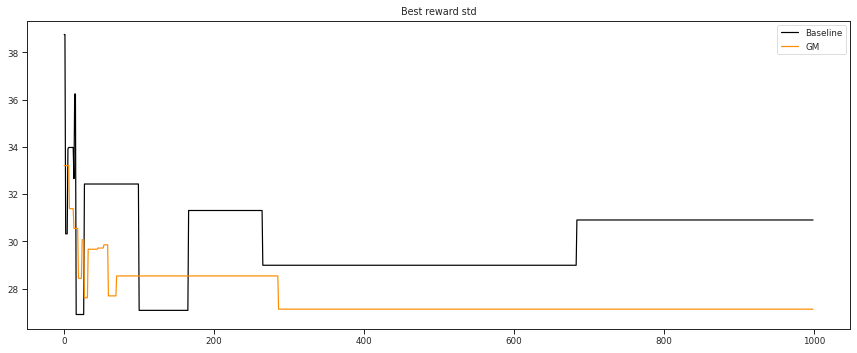

In [91]:
df_baseline["best_reward_std"].plot(label = "Baseline", color = color_baseline)
df_ours["best_reward_std"].plot(label="GM", color = color_ours)
plt.legend()
plt.title(f"Best reward std")
plt.tight_layout()